# Анализ продаж интернет-магазина игр 
**Краткое описание проекта**

Интернет-магазин игр хочет понять наиболее перспективные жанры игр для планирования рекламной каампании. 
Задача выявить закономерност, проанализировать факторы, определяющие успешность игр на базе данных о мировых продажах игр до 2016 года. Анализ позволяет сделать ставку на потенциально успешный продукт и спланировать его рекламную кампанию. Используются классические подходы к обработке и анализу данных. Пример будет полезен для изучения и применения в своих проектах.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

Предоставлена таблица с истрическими данными о продажах игр.

**Описание данных из файла - games.csv:**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную каь ежемесячного платежа


**Краткий план работы:**
- Загрузим и предобработаем данные, проверим наличие дубликатов и пропусков, при необходимости исправим.
- Затем иссследуем: сколько игр выпускалось в разные годы, изменение продаж по платформам, срок жизни платформ, определение актуального периода, выбор потенциально прибыльных платформ, изучение глобальных продаж по платформам, влияние отзывов и оценок критиков на продажи, аспределение игр по ожанрам - самые прибыльные жанры, особенности низких и высоких продаж.
- Составим портрет пользователя по регионам, определение топ-5 жанров и платформ, влияние рейтингов ESRB на продажи в отдельном регионе.
- Проверка гипотез: средние пользовательские рейтинги платформ Xbox One и PC одинаковые; средние пользовательские рейтинги жанров Action  и Sports  разные.
- Общий вывод исследования.

## Шаг 1. Загрузка данных

In [1]:
# Игнгорирование предупреждений системы
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
# Импорт необходимых билиотек
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
# отображаем все столбцы и до 100 строк
pd.options.display.max_columns = 250
pd.options.display.max_rows = 100
#pd.set_option('display.precision', 2)
pd.options.display.float_format = '{:20.2f}'.format

In [3]:
# загружаем данные
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv') # Исторические данные по продажам игр

## Шаг 2. Подготовка данных

In [4]:
# Выведем несколько строи изучим данные
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.00,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,2006.00,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.00,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
# Посмотрим общую информацию о количестве данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# И о количестве пропусков
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Краткий вывод:

- 16715 строк, 11 колонок.
- Пропуски: year_of_release - 269, critic_score - 8578, user_score - 6701, rating - 6766

Заменим названия столбцов - приведем к нижнему регистру;

In [7]:
df.columns = df.columns.str.lower()

Методом describe() посмотрим на описание числовых данных датафрейма.

In [8]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


In [9]:
# Возьмем все числовые столбцы и посмотрим что там вкратце, потом сделаем выводы
df_describe = pd.DataFrame()
for col in df.select_dtypes(include='number').columns: 
    df_describe[col] = [
        df[col].dtypes,
        df[col].isna().count(),
        df[col].count(),
        df[col].isna().sum(), 
        round(100*df[col].isna().sum()/df[col].isna().count(), 2),
        df[col].nunique(),
        df[col].min(),
        df[col].max() ]

df_describe = df_describe.T
df_describe.columns = ['Тип данных', 'Количество строк', 'Строк без пропусков', 'Количество пропусков', 'Пропуски, %', 'Количество уникальных', 'Минимум', 'Максимум']
df_describe = df_describe.T
df_describe

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
Тип данных,float64,float64,float64,float64,float64,float64
Количество строк,16715,16715,16715,16715,16715,16715
Строк без пропусков,16446,16715,16715,16715,16715,8137
Количество пропусков,269,0,0,0,0,8578
"Пропуски, %",1.61,0.00,0.00,0.00,0.00,51.32
Количество уникальных,37,402,307,244,155,82
Минимум,1980.00,0.00,0.00,0.00,0.00,13.00
Максимум,2016.00,41.36,28.96,10.22,10.57,98.00


**Краткие выводы:** 
- Очевидно, что  пропуски 51% данных в оценках критиков - это больше половины. Отбрасыват отсутствующие ячейки не будем. Заменить адекватно пропуски тоже нечем. Но при определении влияния этого показателя на продажи будем учитывать только данные с оценкой.
- Пропуск года релиза - 1,6% - отномительно не много. Можно отбросить строки при оценке влияния на другие показатели. Заменять нулями не будем. Данных не много, просто удалим
- Предсставлены данные с 1980 по 2016 год включительно. Год приведем к типу int. 

Проверим данные на наличие явных дубликатов

In [10]:
df.duplicated().sum()

0

Вывод: полные дубликаты отсутвтуют

Проверяем данные на наличие неявных дубликатов. Проверяем одновременно по названию, платформе и году релиза.

In [11]:
df[df.duplicated(['name', 'platform', 'genre'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005.00,Racing,1.00,0.13,0.02,0.10,83.00,8.5,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.00,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012.00,Racing,0.00,0.06,0.00,0.02,82.00,8.5,T
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.00,Sports,0.00,0.01,0.00,0.00,83.00,5.5,E


Вывод: неявные дубликаты есть. Удаляем!

При удалении неявных дубликатов оставляем первое вхождение, последующие повторы удаляем (параметр keep='first')

И проверяем.

In [12]:
df.drop_duplicates(subset=['name', 'platform', 'genre'], keep='first', inplace=True) 
df[df.duplicated(['name', 'platform', 'genre'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Удаляем строки с пропущенным годом релиза. Проверяем.

In [13]:
df.dropna(subset=['year_of_release'], inplace=True)
df.year_of_release.isna().sum()

0

Приводим год к int и проверяем

In [14]:

df['year_of_release'] = pd.array(df['year_of_release'], dtype=pd.Int64Dtype())
df['year_of_release'].dtype

Int64Dtype()

Выведем не числовые столбцы

In [15]:
df_describe = pd.DataFrame()
for col in df.select_dtypes(exclude=['number', 'datetime']).columns:
    df_describe[col] = [
        df[col].dtypes,
        df[col].isna().count(),
        df[col].count(),
        df[col].isna().sum(), 
        round(100*df[col].isna().sum()/df[col].isna().count(), 2),
        df[col].nunique(),
        # df[col].unique()
]

df_describe = df_describe.T
df_describe.columns = ['Тип данных', 'Количество строк', 'Строк без пропусков', 'Количество пропусков', 'Пропуски, %', 'Количество уникальных', 
                       # 'Уникальные значения'
                      ]
df_describe = df_describe.T
df_describe

,name,platform,genre,user_score,rating
Тип данных,object,object,object,object,object
Количество строк,16442,16442,16442,16442,16442
Строк без пропусков,16441,16442,16441,9836,9765
Количество пропусков,1,0,1,6606,6677
"Пропуски, %",0.01,0.00,0.01,40.18,40.61
Количество уникальных,11426,31,12,96,8


**Выводы:** 
- Много пропусков в показателях оценки пользователей и возрастного рейтинга игры - по 40%. оставляем как есть. При оценке влияния этих строк на другие будем учитывать только строки со значениями.
- Самое главное, что почти инет пропусков у названий и жанров, поскольку агрегировать массив данных будем по ним.
- У нас 12 разных жанров, 31 уникальная платформа.
- Очки пользователей приведем к типу float
- Посмотрим что за строки с пропусками имени и жанра (любопытно). Удалим.

Смотрим все встречающиеся оценки пользователей.

In [16]:
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Смотрим сколько пропусков в оценках

In [17]:
df.user_score.isna().sum()

6606

Одно из значений - tbd это аббревиатура To Be Determined - рейтинг не определен, то есть оценка пользователя отсутствует.  Посчитаем количество.

In [18]:
df[df.user_score=='tbd']['name'].count()

2376

**Вывод:**

Очевидно, что рейтинг tbd означает, что эти игры не самые популярные, выпускались локально и не получили рейтинга. Как решение - замемним такие строки как nan - нет данных.

Меняем, проверяем

In [19]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df[df.user_score=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [20]:
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Приводим оценки пользователей к типу float.

Меняем тип данных в колонке user_score. Проверяем.

In [21]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce').astype('float64')
df['user_score'].dtype

dtype('float64')

In [22]:
df.user_score.unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Посмотрим что за 2 пропуска с названиями и жанрами.

In [23]:
print(df[df.name.isna()])
df = df[~df.name.isna()]

    name platform  year_of_release genre             na_sales  \
659  NaN      GEN             1993   NaN                 1.78   

                eu_sales             jp_sales          other_sales  \
659                 0.53                 0.00                 0.08   

     critic_score  user_score rating  
659           NaN         NaN    NaN  


**Проверим итоги преобразований**

In [24]:
df_describe = pd.DataFrame()
for col in df.columns: 
    if df[col].dtypes in df.select_dtypes(include='number').dtypes.unique():
        df_describe[col] = [
            df[col].dtypes,
            df[col].isna().count(),
            df[col].count(),
            df[col].isna().sum(), 
            round(100*df[col].isna().sum()/df[col].isna().count(), 2),
            df[col].nunique(),
            df[col].min(),
            df[col].max() ]
    else:
        df_describe[col] = [
        df[col].dtypes,
        df[col].isna().count(),
        df[col].count(),
        df[col].isna().sum(), 
        round(100*df[col].isna().sum()/df[col].isna().count(), 2),
        df[col].nunique(),
        '-', 
        '-'
        ]

df_describe = df_describe.T
df_describe.columns = ['Тип данных', 'Количество строк', 'Строк без пропусков', 'Количество пропусков', 'Пропуски, %', 'Количество уникальных', 'Минимум', 'Максимум']
df_describe = df_describe.T
df_describe

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
Тип данных,object,object,Int64,object,float64,float64,float64,float64,float64,float64,object
Количество строк,16441,16441,16441,16441,16441,16441,16441,16441,16441,16441,16441
Строк без пропусков,16441,16441,16441,16441,16441,16441,16441,16441,7980,7460,9765
Количество пропусков,0,0,0,0,0,0,0,0,8461,8981,6676
"Пропуски, %",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,51.46,54.63,40.61
Количество уникальных,11426,31,37,12,401,307,244,155,81,95,8
Минимум,-,-,1980,-,0.00,0.00,0.00,0.00,13.00,0.00,-
Максимум,-,-,2016,-,41.36,28.96,10.22,10.57,98.00,9.70,-


Посмотрим какой рейтинг бывает

In [25]:
print(df.rating.nunique())
df.rating.unique()


8


array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

nan и 8 градаций рейтинга.

Посмотрим какие платформы в датасете и сколько их.

In [26]:
print(df.platform.nunique())
df.platform.unique()

31


array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Посмотрим какие жанры и сколько их.

In [27]:
print(df.genre.nunique())
df.genre.unique()

12


array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Названия и количество игр.

In [28]:
print(df.name.nunique())
df.name.unique()

11426


array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

Посчитем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [29]:
df['all_sales'] = df.loc[:, ['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [30]:
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
280,Street Fighter IV,PS3,2009,Fighting,2.03,1.04,0.58,0.52,94.00,7.30,T,4.17
14220,Red Faction II,GC,2003,Shooter,0.03,0.01,0.00,0.00,79.00,7.30,M,0.04
12306,GRID 2,PC,2013,Racing,0.00,0.06,0.00,0.01,80.00,5.70,E,0.07
7846,Warhammer: Shadow of the Horned Rat,PS,1996,Strategy,0.11,0.07,0.00,0.01,NaN,NaN,NaN,0.19
11581,Lost Dimension,PSV,2014,Role-Playing,0.03,0.01,0.02,0.02,72.00,8.30,T,0.08


Выводим данные по фрейму

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16441 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16441 non-null  object 
 1   platform         16441 non-null  object 
 2   year_of_release  16441 non-null  Int64  
 3   genre            16441 non-null  object 
 4   na_sales         16441 non-null  float64
 5   eu_sales         16441 non-null  float64
 6   jp_sales         16441 non-null  float64
 7   other_sales      16441 non-null  float64
 8   critic_score     7980 non-null   float64
 9   user_score       7460 non-null   float64
 10  rating           9765 non-null   object 
 11  all_sales        16441 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB


In [32]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,16441.00,16441.00,16441.00,16441.00,16441.00,7980.00,7460.00,16441.00
mean,2006.49,0.26,0.15,0.08,0.05,68.99,7.13,0.54
std,5.88,0.82,0.51,0.31,0.19,13.92,1.50,1.56
min,1980.00,0.00,0.00,0.00,0.00,13.00,0.00,0.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00,6.40,0.06
50%,2007.00,0.08,0.02,0.00,0.01,71.00,7.50,0.17
75%,2010.00,0.24,0.11,0.04,0.03,79.00,8.20,0.47
max,2016.00,41.36,28.96,10.22,10.57,98.00,9.70,82.54


**Выводы**<br>
В основном отсутствуют данные в колонке рейтинг игр, оценки критиков, оценки пользователей. 
Пропуски могли возникнуть по причине малой известности игр, из-за того, что в общий фрейм не подгрузились данные из какого-то источника. 
Отсутствующие данные по оценкам критиков и пользователей часто идут по одним и тем же играм.
Так же отсутствуют данные по годам релиза игр - может быть данные изначально не были внесены. Так же пропуски в отзывах могли появиться, потому что продажи игры были низкие и не набралось необходимого количества индивидуальных отзывов для получения итоговой оценки. А так же, игра получила региональный возрастной рейтинг, а не северо-американский ESRB.

По итогам подготовки данных к исследованию осталось примерно 16500 строк: 11400 игр в 12 жанрах на 21 платформе за период с 1980 по 2016 годы. Посмотрим что осталось.

In [33]:
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Index: 16441 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16441 non-null  object 
 1   platform         16441 non-null  object 
 2   year_of_release  16441 non-null  Int64  
 3   genre            16441 non-null  object 
 4   na_sales         16441 non-null  float64
 5   eu_sales         16441 non-null  float64
 6   jp_sales         16441 non-null  float64
 7   other_sales      16441 non-null  float64
 8   critic_score     7980 non-null   float64
 9   user_score       7460 non-null   float64
 10  rating           9765 non-null   object 
 11  all_sales        16441 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
name :

## Шаг 3. Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды? ###

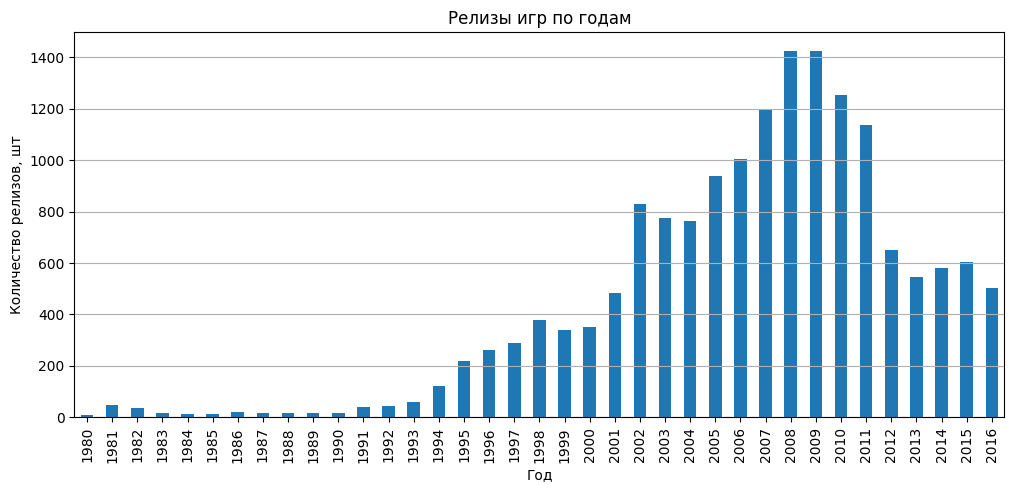

In [34]:
# Посмотрим сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
(df.pivot_table(index=['year_of_release'], 
               aggfunc=({'name':'count'}))
              .plot(kind='bar', 
                    figsize=(12,5), 
                    grid=True, 
                    legend=False,
                    title='Релизы игр по годам', 
                    xlabel='Год', 
                    ylabel='Количество релизов, шт'))
plt.grid(axis='x')
plt.show()

**Вывод:** До 1994 года данных мало, потом идет активный рост релизов разных игр. С 2012 года количество скорректировалось - вероятно, что какие-то форматы и платформы совссем ушли. Можно опираться на данные с 2012 по 2016 год.

### Посмотрим как менялись продажи по платформам.
Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Ответим на вопрос - за какой характерный срок появляются новые и исчезают старые платформы?

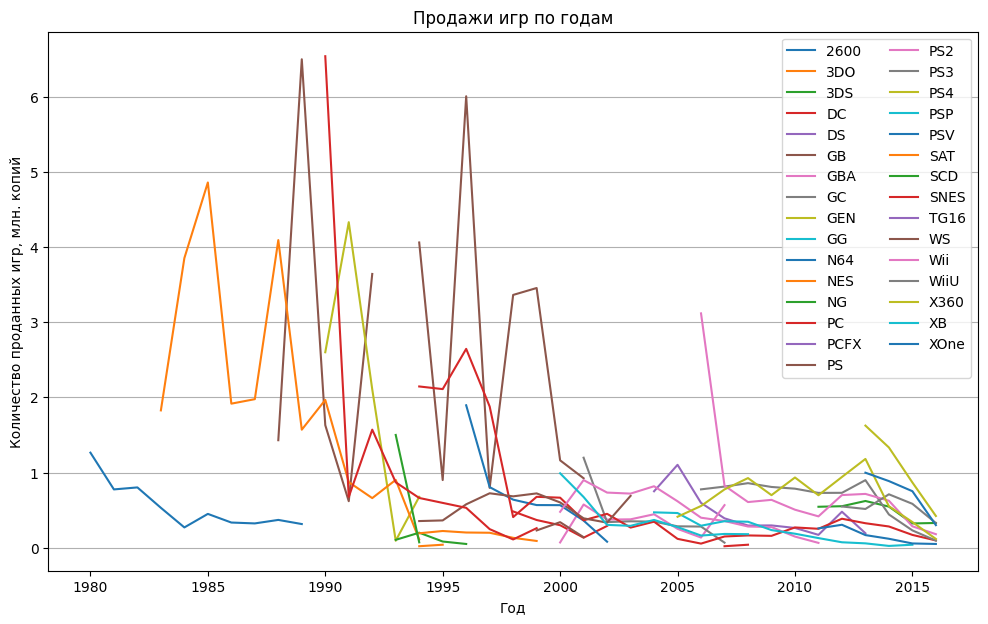

In [35]:
(df.pivot_table(index=['year_of_release'], 
                values='all_sales', 
                columns='platform', )
               .plot(kind='line', 
                     figsize=(12,7), 
                     grid=True, 
                     legend=True,
                     title='Продажи игр по годам', 
                     xlabel='Год', 
                     ylabel='Количество проданных игр, млн. копий'))
plt.grid(axis='x')
plt.legend(bbox_to_anchor=[1, 1], loc='upper right', ncol=2)
plt.show()

Построим график с легендой в 4 колонки.

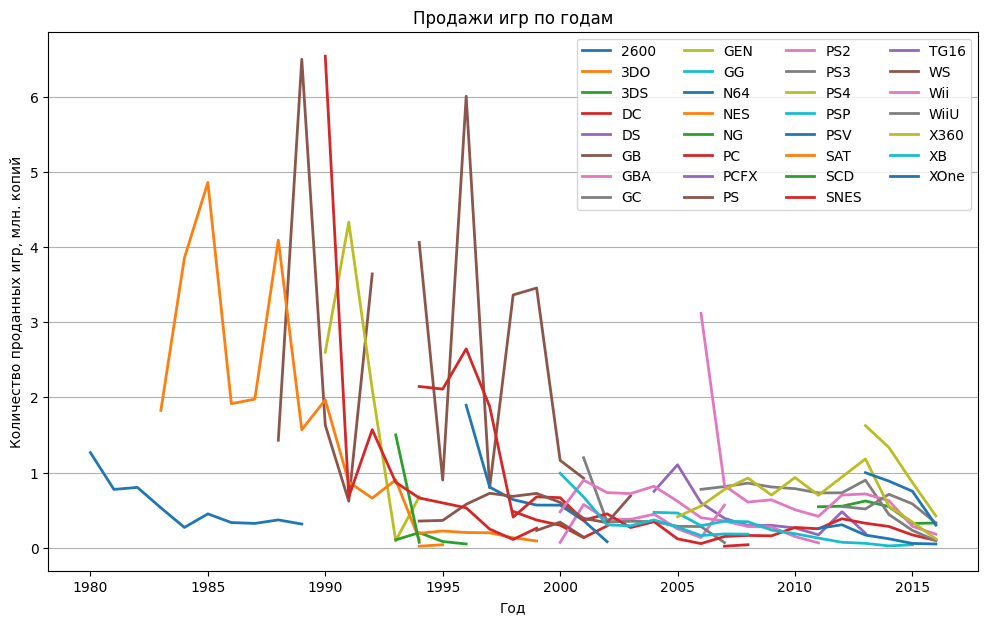

In [36]:
(df.pivot_table(index=['year_of_release'], 
                values='all_sales', 
                columns='platform', )
               .plot(kind='line', 
                     figsize=(12,7), 
                     grid=True, 
                     legend=True, 
                     lw=2,
                     title='Продажи игр по годам', 
                     xlabel='Год', 
                     ylabel='Количество проданных игр, млн. копий'))
plt.grid(axis='x')
plt.legend(bbox_to_anchor=[1, 1], loc='upper right', ncol=4)
plt.show()

Находим 10 платформ с самыми большими продажами. Построим для наглядности график.

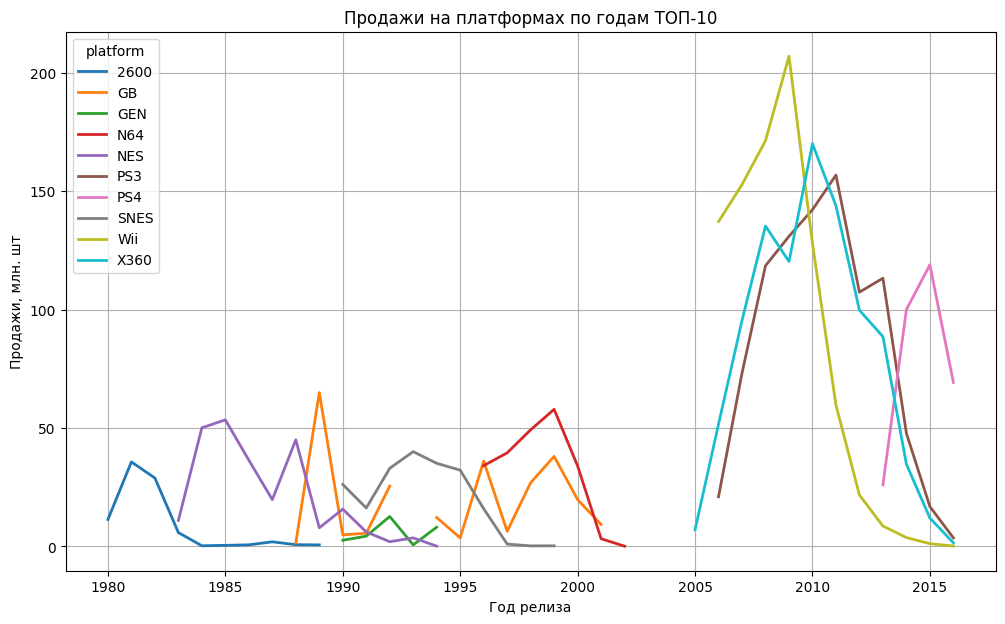

In [37]:
# TOP-10 платформ с наибольшими суммарными продажами
sales_platforms = (df.pivot_table(index=['platform'], 
                                 values='all_sales')
                                .sort_values(by='all_sales', 
                                             ascending=False)[:10]
                                            .reset_index())
pf_list = sales_platforms.platform.to_list()
platform_top = df.query('platform in @pf_list')
top_sales_platform = (platform_top.pivot_table(index=['platform', ], 
                                               columns='year_of_release', 
                                               values='all_sales', 
                                               aggfunc='sum').T.reset_index())
(platform_top.pivot_table(index=['platform', ], 
                          columns='year_of_release', 
                          values='all_sales', 
                          aggfunc='sum').T.reset_index().
 plot(kind='line', 
      x='year_of_release', 
      figsize=(12, 7), 
      grid=True, 
      title='Продажи на платформах по годам ТОП-10', 
      lw=2,
      xlabel='Год релиза', 
      ylabel='Продажи, млн. шт')
)
plt.show()

Среди данных платформ посчитаем годы их существования, выведем график для наглядности.

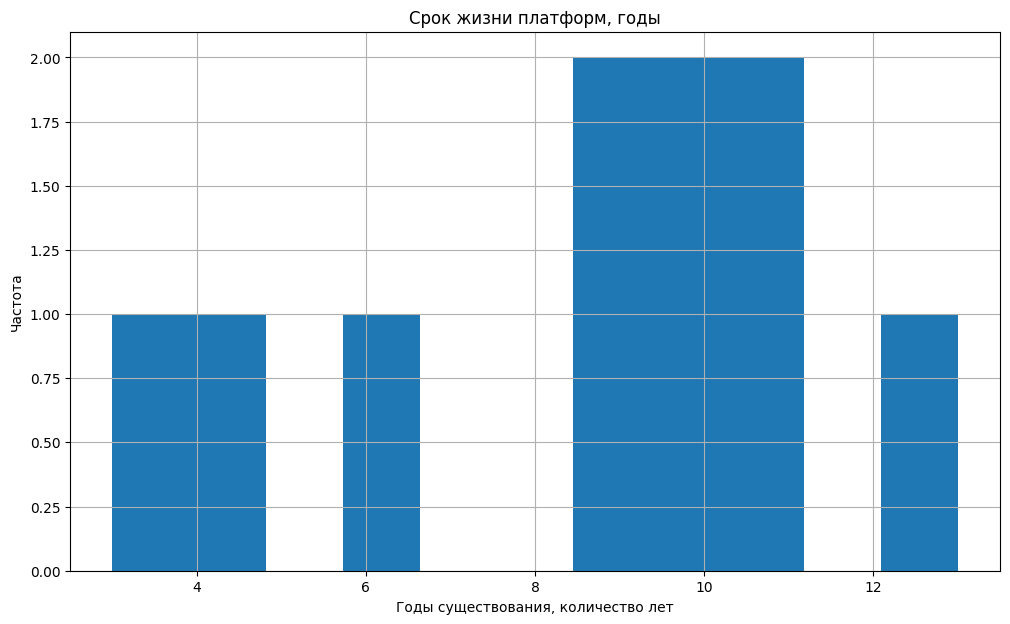

  platform   max   min  years
0     2600  1989  1980      9
1       GB  2001  1988     13
2      GEN  1994  1990      4
3      N64  2002  1996      6
4      NES  1994  1983     11
5      PS3  2016  2006     10
6      PS4  2016  2013      3
7     SNES  1999  1990      9
8      Wii  2016  2006     10
9     X360  2016  2005     11


count                  10.00
mean                    8.60
std                     3.24
min                     3.00
25%                     6.75
50%                     9.50
75%                    10.75
max                    13.00
Name: years, dtype: Float64

In [38]:
years_top = platform_top.pivot_table(index=['platform', ], 
                                     aggfunc=({'year_of_release':['min', 'max']})).reset_index()
years_top.columns = ['platform', 'max', 'min']
years_top['years'] = years_top['max'] - years_top['min']
axes = years_top.years.plot(kind='hist', 
                            bins=11, 
                            range=(3, 13), 
                            figsize=(12,7), 
                            grid=True, 
                            title='Срок жизни платформ, годы',
                            legend=False)
axes.set_xlabel('Годы существования, количество лет')
axes.set_ylabel('Частота')
plt.show()
print(years_top)
years_top.years.describe()

Определим средний срок жизни игровой платформы.

In [39]:
temp = df.copy() 
time_life = temp.pivot_table(index='platform', 
                             values='year_of_release', 
                             aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1
time_life['life'].median()

7.0

**Вывод** Средний срок жизни игровой платформы - 7 лет.

### Возьмем данные за актуальный период.
Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Для целей прогнозирования возьмем период с 2014 по 2016 годы, который включает 2 полных года (2014 и 2015) и данные за не полный 2016 год. Обозначаем акатуальный период, выводим краткое описание.

In [40]:
actual_df = df.query('2014 <=  year_of_release <= 2016')
actual_df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,1689.00,1689.00,1689.00,1689.00,1689.00,718.00,888.00,1689.00
mean,2014.95,0.17,0.16,0.06,0.05,72.31,6.62,0.43
std,0.80,0.45,0.47,0.21,0.14,12.21,1.59,1.06
min,2014.00,0.00,0.00,0.00,0.00,19.00,0.20,0.01
25%,2014.00,0.00,0.00,0.00,0.00,66.00,5.80,0.03
50%,2015.00,0.02,0.02,0.01,0.01,74.00,7.00,0.10
75%,2016.00,0.12,0.12,0.04,0.04,81.00,7.80,0.35
max,2016.00,6.03,6.31,3.18,2.38,97.00,9.30,14.63


### Определяем какие платформы лидируют по продажам, растут или падают.
Выберем несколько потенциально прибыльных платформ. Для этого строим график динамики продаж по платформам за период 2014-2016 годы.

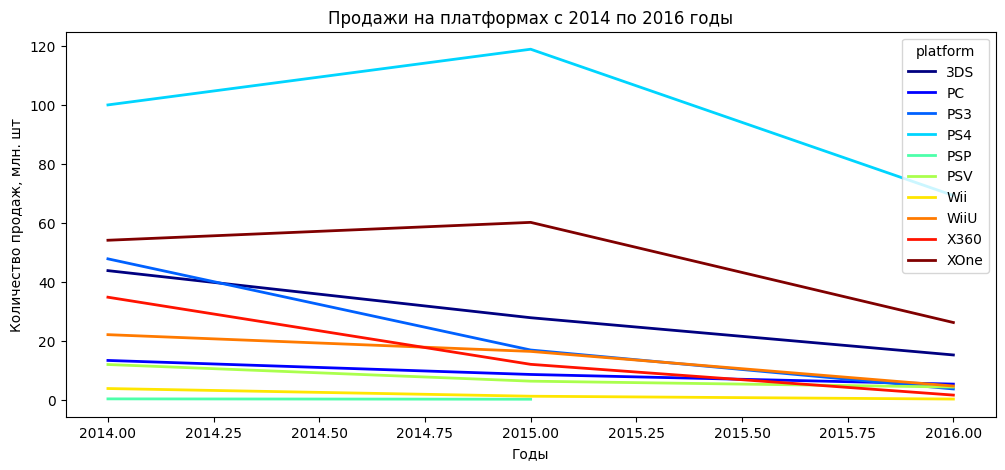

In [41]:
(actual_df.pivot_table(index=['platform', ], 
                       columns='year_of_release', 
                       values='all_sales', 
                       aggfunc='sum').T.reset_index().
 plot(kind='line', 
      x='year_of_release', 
      figsize=(12, 5), 
      title='Продажи на платформах с 2014 по 2016 годы',
      lw=2, 
      colormap='jet', 
      xlabel='Годы', 
      ylabel='Количество продаж, млн. шт'))
plt.show()

Посмотрим на суммарные объемы продаж по платформам.

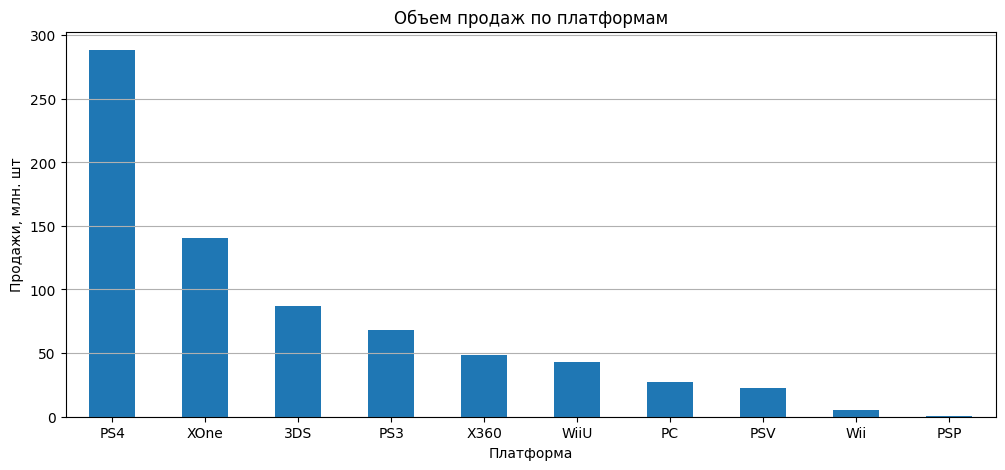

In [42]:
(actual_df.pivot_table(index='platform', 
                      aggfunc=({'all_sales':'sum'}))
                     .sort_values(by='all_sales', 
                                  ascending=False)
                                 .plot(kind='bar', 
                                       figsize=(12, 5), 
                                       rot=0, 
                                       legend=False,
                                       title='Объем продаж по платформам', 
                                       xlabel='Платформа', 
                                       ylabel='Продажи, млн. шт'))
plt.grid(axis='y')
plt.show()

**Вывод:**

2 платформы показывают рост - PS4 и XOne. Они же по итогам 2015 года были лидерами по объему продаж.

### Распределение продаж игр в разбивке по платформам.
Построим график «ящик с усами» по глобальным продажам игр.

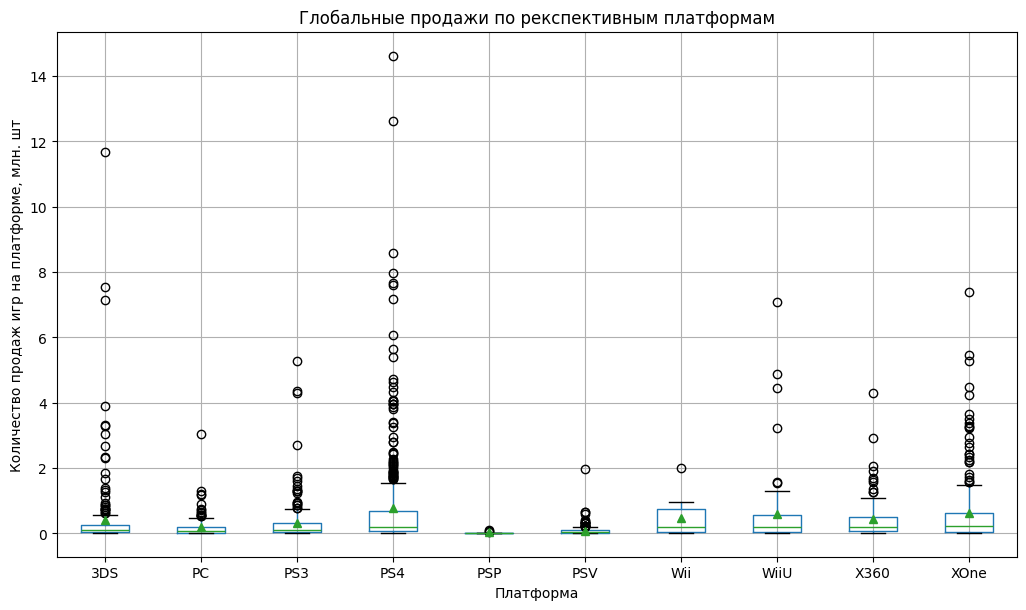

In [43]:
ax = (actual_df.sort_values(by='all_sales', 
                            ascending=False)
                           .boxplot(column='all_sales', 
                                    by='platform', 
                                    showmeans=True, 
                                    showcaps=True, 
                                    showbox=True, 
                                    vert=True, 
                                    showfliers=True, 
                                    figsize=(12,7), ))
plt.title('Глобальные продажи по рекспективным платформам')
plt.suptitle('')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж игр на платформе, млн. шт')
plt.show()

Добавим диаграмму с ограниченным по объемам продаж (до 2 млн шт.) выводом чтобы подробнее рассмотреть ящики.

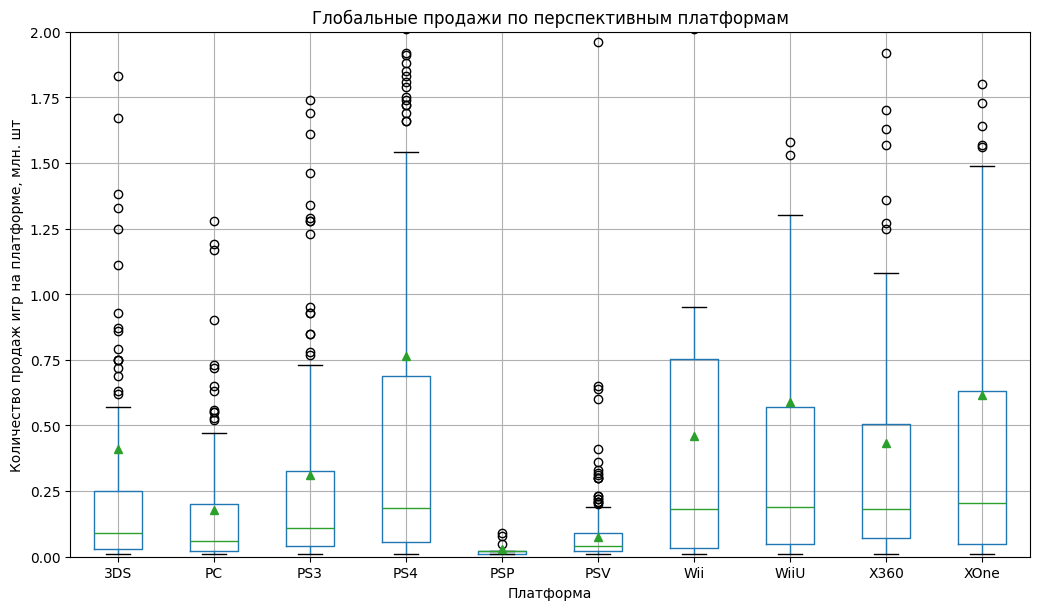

In [44]:
ax = (actual_df.sort_values(by='all_sales', 
                            ascending=False)
                           .boxplot(column='all_sales', 
                                    by='platform', 
                                    showmeans=True, 
                                    showcaps=True, 
                                    showbox=True, 
                                    vert=True, 
                                    showfliers=True, 
                                    figsize=(12,7), ))
plt.ylim(0, 2)
plt.title('Глобальные продажи по перспективным платформам')
plt.suptitle('')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж игр на платформе, млн. шт')
plt.show()

**Вывод:** В прогнозе на какие платформы ориентироваться исходим из того, что некоторые игры могут выстрелить, образуя на диаграмме выброс. Поэтому при наличии таких выбросов ориентируемся на показатель медианы, межквартильного размаха (там лежит половина всех значений совокупности) и верхней и нижней границ выбросов (диапазон охватывает 99% всех возможных значений).
Опираясь на это перспективны платформы: PS4, XOne, WiiU, X360, Wii.

### Смотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
Строим диаграмму рассеяния и считаем корреляцию между отзывами и продажами. 

На примере самой популярной платформы PS4 проверим как влияют на продажи отзывы пользователей и критиков. Отфильтруем выбороку по названию платформы.

In [45]:
ps4_df = actual_df.query('platform=="PS4"')[['critic_score', 'user_score', 'all_sales']]

Строим диаграмму рассеяния Продажи - Оценка критиков

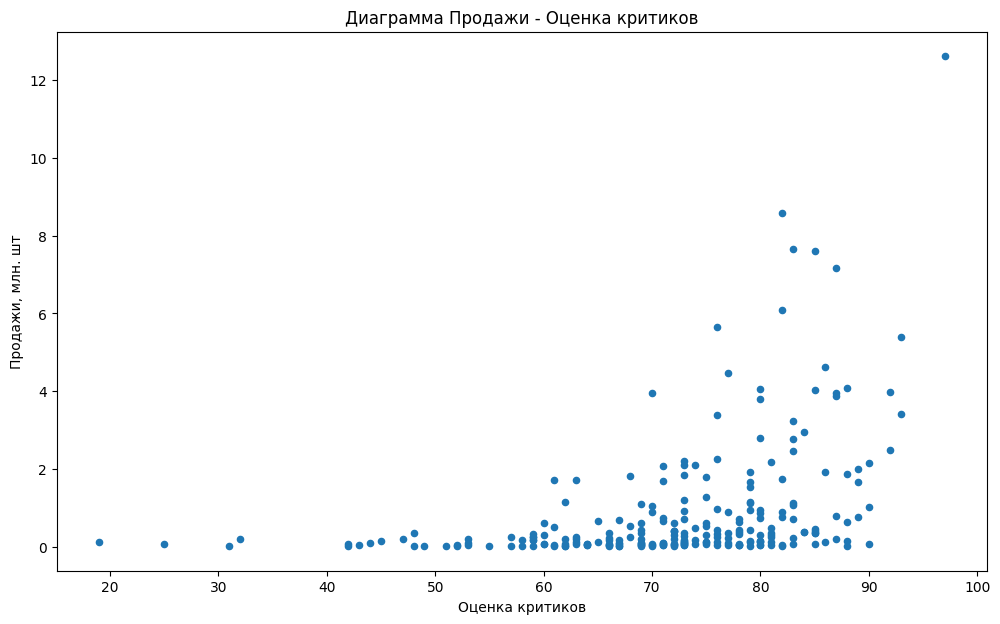

In [46]:
ps4_df.plot(kind='scatter', 
            x='critic_score', 
            y='all_sales', 
            figsize=(12,7), 
            title='Диаграмма Продажи - Оценка критиков', 
            xlabel='Оценка критиков', 
            ylabel='Продажи, млн. шт')
plt.show()

Строим диаграмму рассеяния Продажи - Оценка пользователей

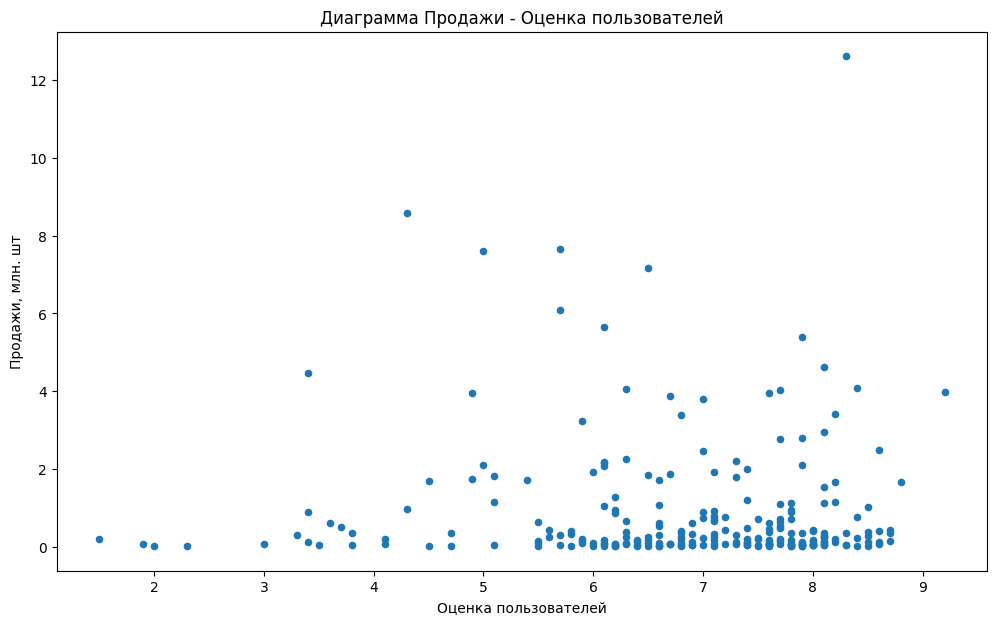

In [47]:
ps4_df.plot(kind='scatter', 
            x='user_score', 
            y='all_sales', 
            figsize=(12,7), 
            title='Диаграмма Продажи - Оценка пользователей', 
            xlabel='Оценка пользователей', 
            ylabel='Продажи, млн. шт')
plt.show()

Проверяем корреляцию

In [48]:
ps4_df.corr()

,critic_score,user_score,all_sales
critic_score,1.00,0.55,0.40
user_score,0.55,1.00,-0.04
all_sales,0.40,-0.04,1.00


**Выводы:** Корреляциии между продажами и оценками пользователей - отсутствует, между продажами и оценками критиков - слабая.

### Соотносим выводы с продажами игр на других платформах.

Для сравнения полученных данных с данными другой платформы, возьмем ближайшую по продажам платформу
XOne

Сделаем в виде цикла проверку корреляции на других популярных платформах

Платформа:  PS4                      critic_score           user_score            all_sales
critic_score                 1.00                 0.55                 0.40
user_score                   0.55                 1.00                -0.04
all_sales                    0.40                -0.04                 1.00



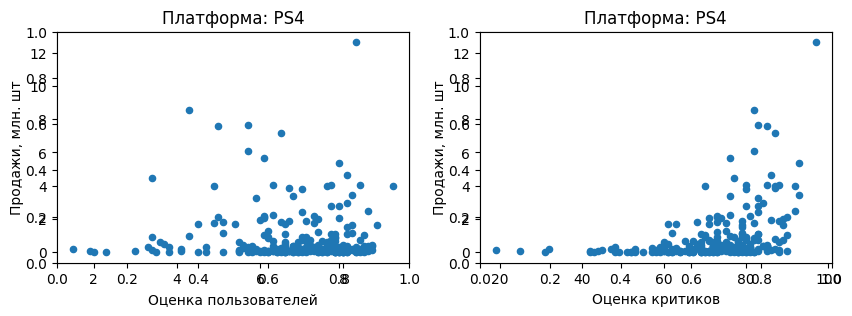

Платформа:  3DS                      critic_score           user_score            all_sales
critic_score                 1.00                 0.86                 0.31
user_score                   0.86                 1.00                 0.22
all_sales                    0.31                 0.22                 1.00



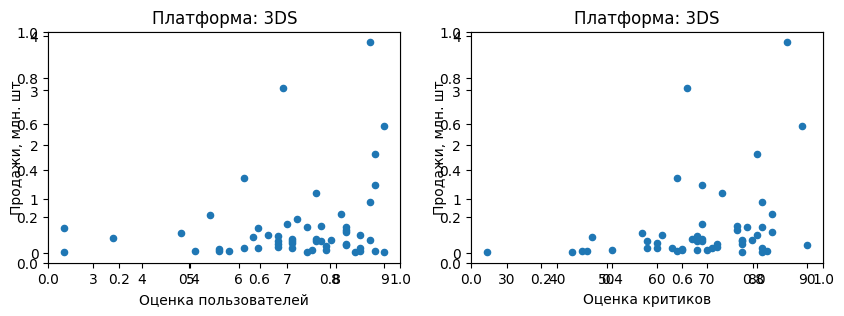

Платформа:  XOne                      critic_score           user_score            all_sales
critic_score                 1.00                 0.44                 0.43
user_score                   0.44                 1.00                -0.07
all_sales                    0.43                -0.07                 1.00



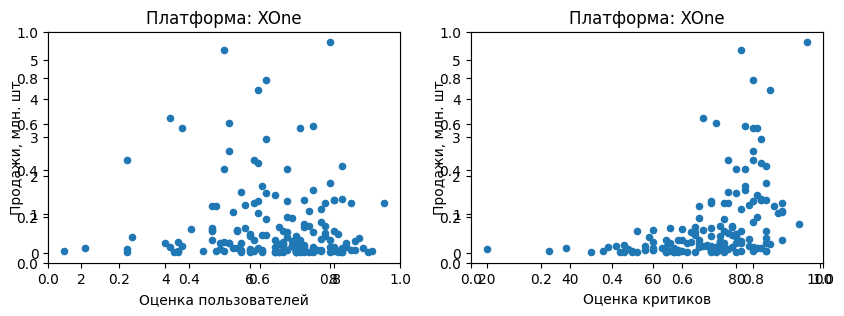

Платформа:  WiiU                      critic_score           user_score            all_sales
critic_score                 1.00                 0.76                 0.37
user_score                   0.76                 1.00                 0.41
all_sales                    0.37                 0.41                 1.00



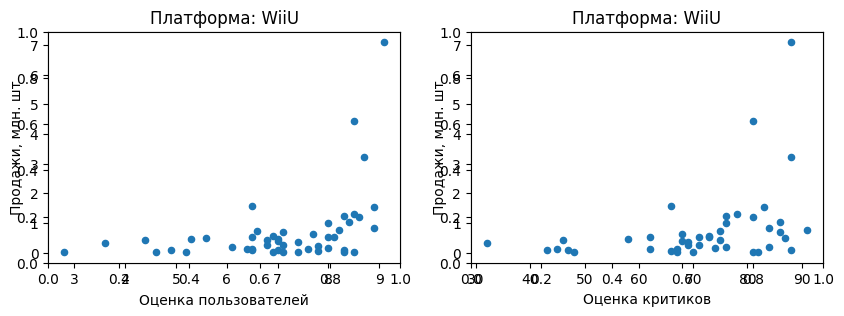

Платформа:  PS3                      critic_score           user_score            all_sales
critic_score                 1.00                 0.69                 0.45
user_score                   0.69                 1.00                -0.17
all_sales                    0.45                -0.17                 1.00



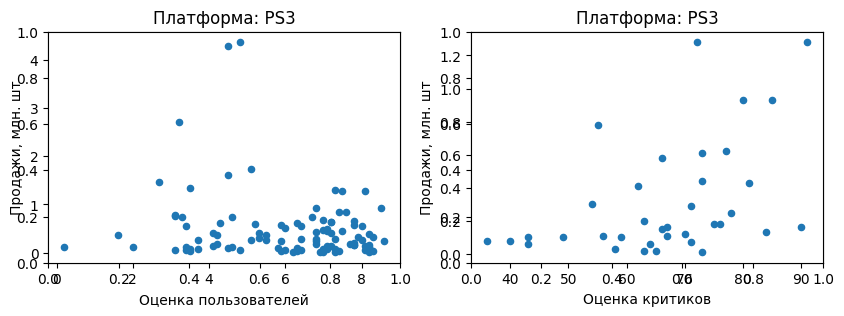

Платформа:  X360                      critic_score           user_score            all_sales
critic_score                 1.00                 0.63                 0.53
user_score                   0.63                 1.00                -0.14
all_sales                    0.53                -0.14                 1.00



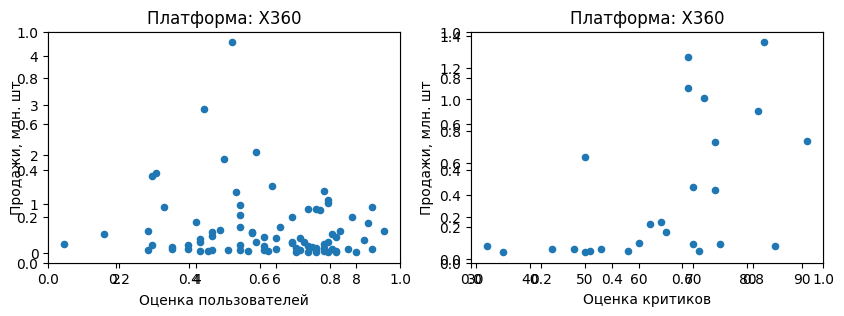

Платформа:  PC                      critic_score           user_score            all_sales
critic_score                 1.00                 0.47                 0.17
user_score                   0.47                 1.00                -0.07
all_sales                    0.17                -0.07                 1.00



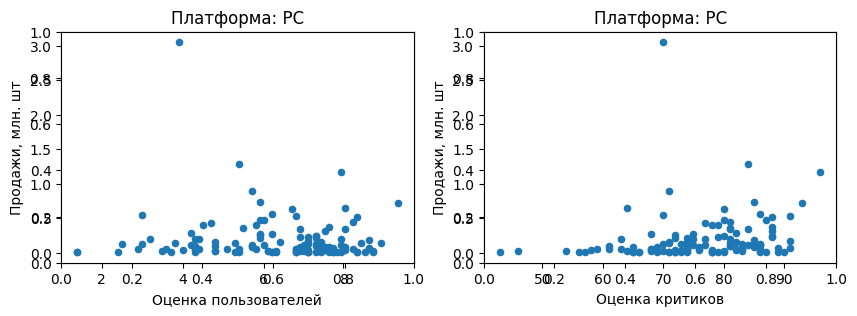

Платформа:  Wii               critic_score           user_score            all_sales
critic_score           NaN                  NaN                  NaN
user_score             NaN                 1.00                 1.00
all_sales              NaN                 1.00                 1.00



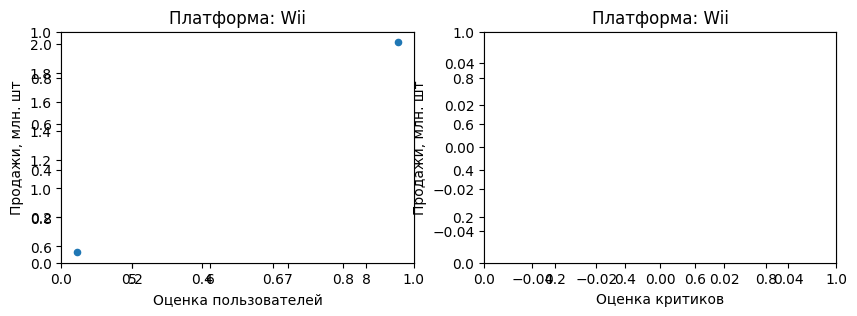

Платформа:  PSV                      critic_score           user_score            all_sales
critic_score                 1.00                 0.52                 0.04
user_score                   0.52                 1.00                -0.17
all_sales                    0.04                -0.17                 1.00



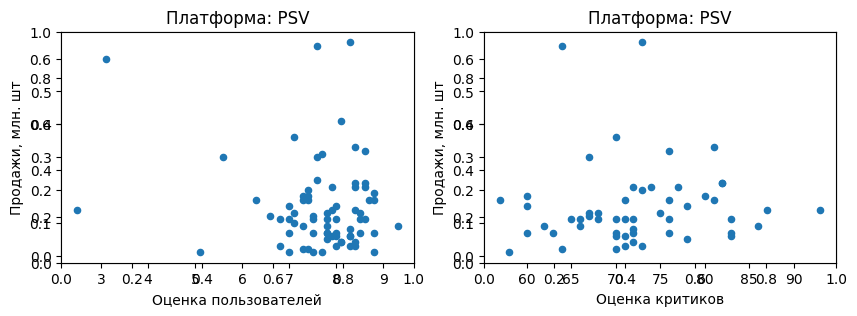

Платформа:  PSP               critic_score  user_score            all_sales
critic_score           NaN         NaN                  NaN
user_score             NaN         NaN                  NaN
all_sales              NaN         NaN                 1.00



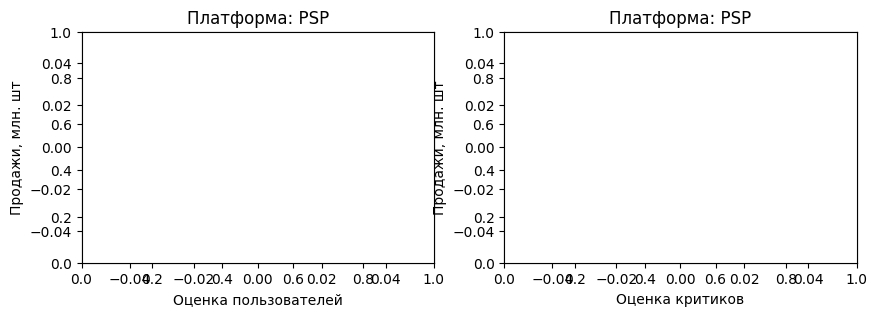

In [49]:
platform_list = actual_df.platform.unique().tolist()
for plat in platform_list:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    print('==='*40)
    print('Платформа: ', plat, actual_df.query('platform==@plat')[['critic_score', 'user_score', 'all_sales']].corr())
    print()
    plt.subplot(1, 2, 1) 
    (actual_df.query('platform==@plat')[['critic_score', 'user_score', 'all_sales']]
                 .dropna(subset=['user_score'])
                     .plot(kind='scatter', 
                           x='user_score', 
                           y='all_sales', 
                           title='Платформа: %s' %plat,
                           xlabel='Оценка пользователей', 
                           ylabel='Продажи, млн. шт', 
                           ax=ax1))
    plt.subplot(1, 2, 2) 
    (actual_df.query('platform==@plat')[['critic_score', 'user_score', 'all_sales']]
                 .dropna(subset=['critic_score'])
                     .plot(kind='scatter', 
                           x='critic_score', 
                           y='all_sales', 
                           title='Платформа: %s' %plat,
                           xlabel='Оценка критиков', 
                           ylabel='Продажи, млн. шт', 
                           ax=ax2))
    plt.show()

**Выводы:** Корреляция между продажами и оценками критиков - такая же слабая, связь между оценками пользователей и продажами отсутствует. 

### Общее распределение игр по жанрам. 

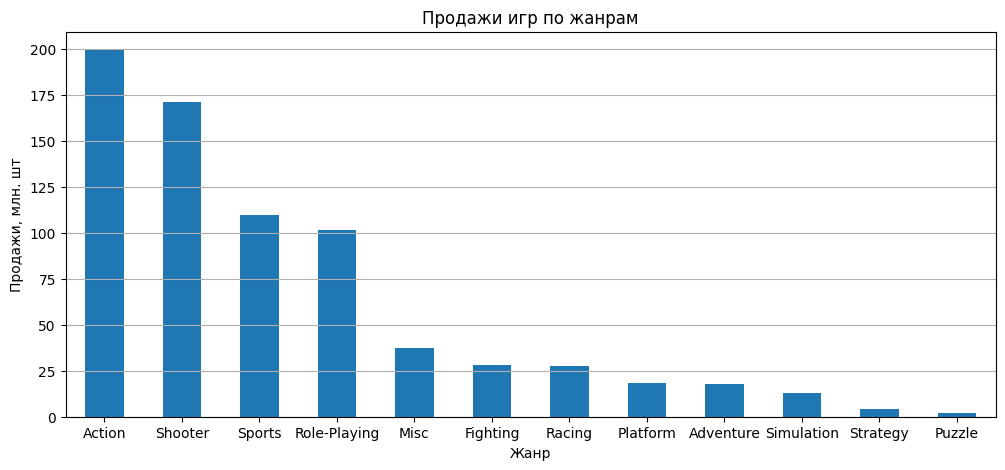

In [50]:
(actual_df.pivot_table(index='genre', 
                       aggfunc=({'all_sales':'sum'}))
                      .sort_values(by='all_sales', 
                                   ascending=False)
                                  .plot(kind='bar', 
                                        title='Продажи игр по жанрам', 
                                        figsize=(12, 5), 
                                        rot=0, 
                                        legend=False, 
                                        xlabel='Жанр', 
                                        ylabel='Продажи, млн. шт'))
plt.grid(axis='y')
plt.show()

**Промежуточный вывод:** 
Лидеры продаж игры в жанре Action. Так же высокие продажи в категориях Shooter, Sports, Role_Playing.
Минимальные продажи у игр в жарнах Puzzle, Strategy, Simulation, Adventue, Platform. 

Оценим жанры между собой через диаграммы размаха и медианные продажи.

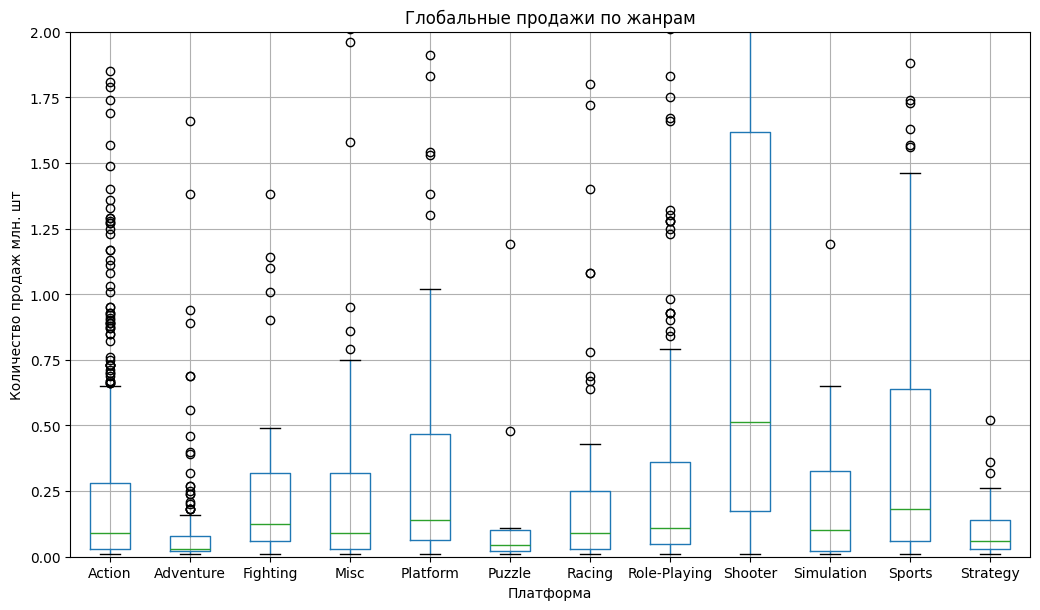

In [51]:
(actual_df.sort_values(by='all_sales', 
                       ascending=False)
                      .boxplot(column='all_sales', 
                               by='genre', 
                               figsize=(12,7)))
plt.ylim(0, 2)
plt.title('Глобальные продажи по жанрам')
plt.suptitle('')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж млн. шт')
plt.show()

Посчитаем в виде таблицы медиану по жанрам.

In [52]:
(actual_df.pivot_table(index='genre', 
                       aggfunc=({'all_sales':['sum','median']}))
                      .sort_values(by= ('all_sales', 'median'), 
                                   ascending=False))

all_sales                     
                           median                  sum
genre                                                 
Shooter                      0.52               170.94
Sports                       0.18               109.48
Platform                     0.14                18.09
Fighting                     0.12                28.22
Role-Playing                 0.11               101.44
Simulation                   0.10                13.13
Action                       0.09               199.36
Misc                         0.09                37.55
Racing                       0.09                27.52
Strategy                     0.06                 3.96
Puzzle                       0.04                 2.21
Adventure                    0.03                17.55

**Окончательный вывод:**
Лидеры продаж игры в жанре Action. Так же высокие продажи в категориях Shooter, Sports, Role_Playing. Минимальные продажи у игр в жарнах Puzzle, Strategy, Simulation, Adventue, Platform.
Сравнение медианных показателей продаж по жанрам в порядке убывания:  Shooter, Sports, Platform, Fighting, Role-Playing. По этим жанрам наблюдается наиболее устойчивый спрос.

## Шаг 4. Портрет пользователя каждого региона 

Самые популярные платформы (топ-5) для каждого региона (NA, EU, JP). Выведем сводную таблицу по всем регионам и платформам.

In [53]:
platform_df = (actual_df.pivot_table(index='platform', 
                                     aggfunc=({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'all_sales':'sum'}))
                                    .sort_values(by='all_sales', 
                                                 ascending=False)
                                                .drop('all_sales', axis=1))
platform_df 

,eu_sales,jp_sales,na_sales
platform,,,
PS4,130.04,15.02,98.61
XOne,46.25,0.32,81.27
3DS,16.12,44.24,22.64
PS3,25.54,11.22,22.05
X360,15.49,0.08,28.30
WiiU,13.15,7.31,19.36
PC,17.97,0.00,7.23
PSV,3.53,14.54,2.52
Wii,2.59,0.00,2.08


Выведем ТОП-5 по регионам. С помощью цикла.

In [54]:
platform_list = ['na_sales', 'eu_sales', 'jp_sales']
for plat in platform_list:
    print(plat)
    platform = (actual_df.pivot_table(index='platform', 
                                     aggfunc=({plat:'sum'}))
                                    .sort_values(by=plat, 
                                                 ascending=False)[:5])
    platform_other = (actual_df.pivot_table(index='platform', 
                                            aggfunc=({plat:'sum'}))
                                           .sort_values(by=plat, 
                                                        ascending=False)[5:]
                                                       .sum()[0])
    platform = platform.reset_index()
    platform.loc[ len(platform.index )] = ['Other', platform_other]
    platform.set_index('platform')
    print(platform)
    print()

na_sales
  platform             na_sales
0      PS4                98.61
1     XOne                81.27
2     X360                28.30
3      3DS                22.64
4      PS3                22.05
5    Other                31.19

eu_sales
  platform             eu_sales
0      PS4               130.04
1     XOne                46.25
2      PS3                25.54
3       PC                17.97
4      3DS                16.12
5    Other                34.76

jp_sales
  platform             jp_sales
0      3DS                44.24
1      PS4                15.02
2      PSV                14.54
3      PS3                11.22
4     WiiU                 7.31
5    Other                 0.76



Визуализируем соотношение продаж по платформам и регионам.

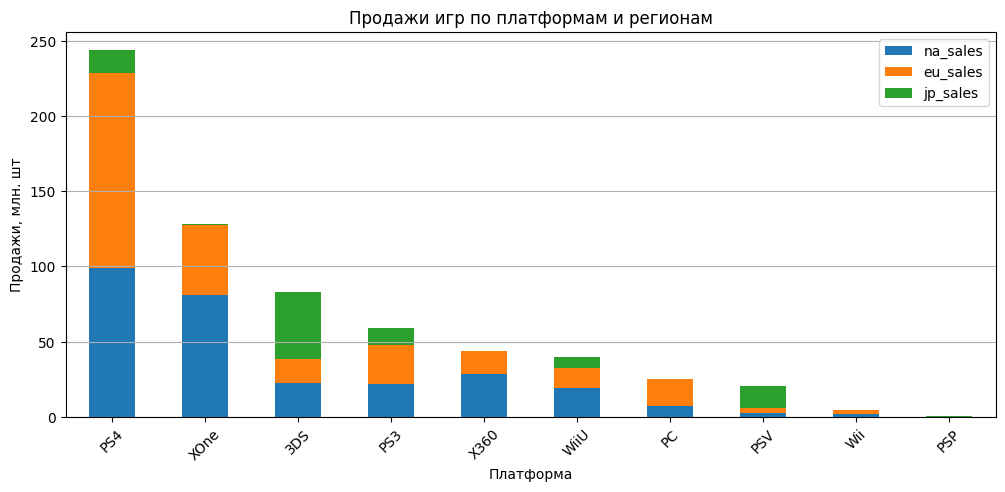

In [55]:
(platform_df.reset_index()
         .plot(kind='bar', 
               x='platform', 
               y=['na_sales', 'eu_sales', 'jp_sales'], 
               figsize=(12,5), 
               ylabel='Продажи, млн. шт', 
               xlabel='Платформа', 
               rot=45, 
               stacked=True, 
               title='Продажи игр по платформам и регионам'))
plt.grid(axis='y')
plt.show()

Визуализируем на круговых диаграммах

In [56]:
na_platform = actual_df.pivot_table(index='platform', aggfunc=({'na_sales':'sum'})).sort_values(by='na_sales', ascending=False)[:5]
platform_other = actual_df.pivot_table(index='platform', aggfunc=({'na_sales':'sum'})).sort_values(by='na_sales', ascending=False)[5:].sum()[0]
na_platform.loc['Other'] = [platform_other]

eu_platform = actual_df.pivot_table(index='platform', aggfunc=({'eu_sales':'sum'})).sort_values(by='eu_sales', ascending=False)[:5]
platform_other = actual_df.pivot_table(index='platform', aggfunc=({'eu_sales':'sum'})).sort_values(by='eu_sales', ascending=False)[5:].sum()[0]
eu_platform.loc['Other'] = [platform_other]

jp_platform = actual_df.pivot_table(index='platform', aggfunc=({'jp_sales':'sum'})).sort_values(by='jp_sales', ascending=False)[:5]
platform_other = actual_df.pivot_table(index='platform', aggfunc=({'jp_sales':'sum'})).sort_values(by='jp_sales', ascending=False)[5:].sum()[0]
jp_platform.loc['Other'] = [platform_other]


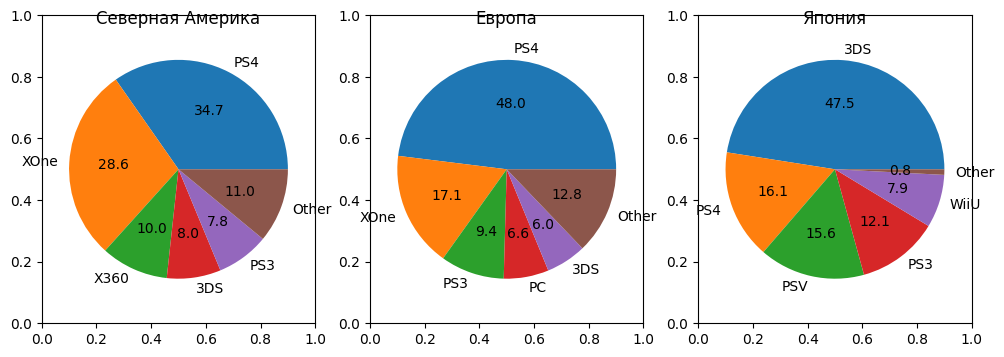

In [57]:
fig, axes = plt.subplots(nrows=1, 
                         ncols=3, 
                         figsize=(12, 4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
na_platform.plot(kind='pie', y='na_sales', grid = False, legend=False, autopct = '%.1f', ax=ax1, title='Северная Америка');
eu_platform.plot(kind='pie', y='eu_sales', grid = False, legend=False, autopct = '%.1f', ax=ax2, title='Европа');
jp_platform.plot(kind='pie', y='jp_sales', grid = False, legend=False, autopct = '%.1f', ax=ax3, title='Япония');

plt.show() 

**Выводы:**

- По  регионам платформы-лидеры отличаются.
- Северная Америка - наиболее популярны игровые платформы: PS4, XOne, X360, 3DS, PS3.
- На рынке Европы популярны платформы: PS4, XOne, PS3, PC, 3DS. Причем, PS4 занимамет больше половиниы от всех продаж.
- В Японии популярны платформы: 3DS, PS4, PSV, PS3, WiiU.

### Самые популярные жанры (топ-5). Поясните разницу.  ###

Наглядности ради построим общую диаграмму по регионам и жанрам.

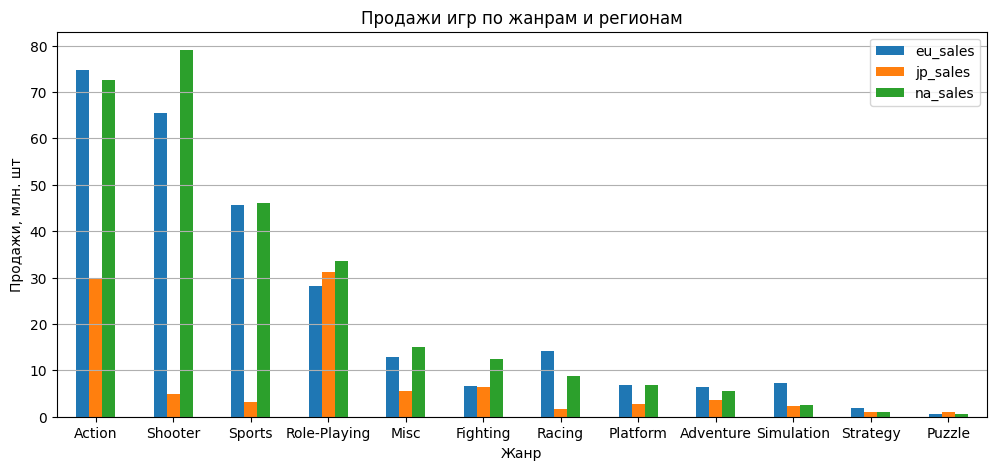

In [58]:
actual_df
(actual_df.pivot_table(index='genre', 
                       aggfunc=({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'all_sales':'sum'}))
                      .sort_values(by='all_sales', 
                                   ascending=False)
                                  .drop('all_sales', axis=1)
                                  .plot(kind='bar', 
                                        figsize=(12,5), 
                                        title='Продажи игр по жанрам и регионам',
                                        rot=0, 
                                        legend=True, 
                                        xlabel='Жанр', 
                                        ylabel='Продажи, млн. шт'))
plt.grid(axis='y')
plt.show()

<font color='Blue'><b>Тоже добавил сектор Остальное</b></font><br>

Чтобы увидеть доли в ТОП-5 по жанрам по каждому региону строим круговые диаграммы

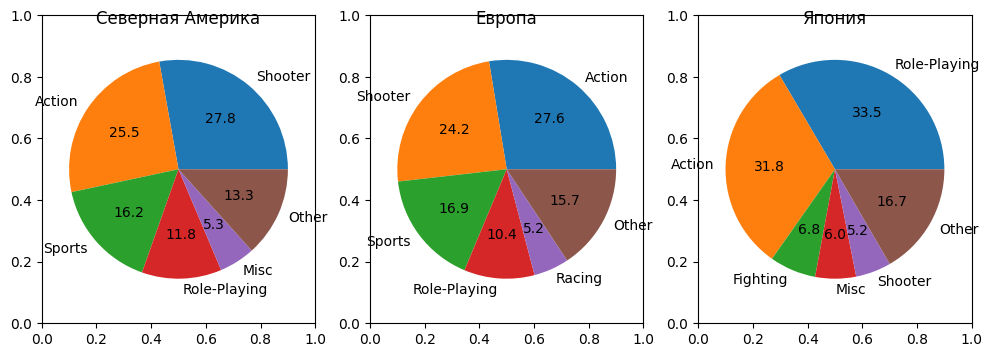

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

genre_other = (actual_df.pivot_table(index='genre', 
                                    aggfunc=({'na_sales':'sum'}))
                                   .sort_values(by='na_sales', 
                                                ascending=False)[5:].sum()[0])
na_genre = (actual_df.pivot_table(index='genre', 
                                  aggfunc=({'na_sales':'sum'}))
                                 .sort_values(by='na_sales', 
                                              ascending=False)[:5])
na_genre.loc['Other'] = [genre_other]
na_genre.plot(title='Северная Америка', 
              kind='pie', 
              y='na_sales', 
              grid = False, 
              legend=False, 
              autopct = '%.1f', 
              ax=ax1);

genre_other = (actual_df.pivot_table(index='genre', 
                                     aggfunc=({'eu_sales':'sum'}))
                                    .sort_values(by='eu_sales', 
                                                 ascending=False)[5:].sum()[0])
eu_genre = (actual_df.pivot_table(index='genre', 
                                  aggfunc=({'eu_sales':'sum'}))
                                 .sort_values(by='eu_sales', 
                                              ascending=False)[:5])
eu_genre.loc['Other'] = [genre_other]
eu_genre.plot(title='Европа', 
              kind='pie', 
              y='eu_sales', 
              grid = False, 
              legend=False, 
              autopct = '%.1f', 
              ax=ax2);

genre_other = (actual_df.pivot_table(index='genre', 
                                     aggfunc=({'jp_sales':'sum'}))
                                    .sort_values(by='jp_sales', 
                                                 ascending=False)[5:].sum()[0])
jp_genre = (actual_df.pivot_table(index='genre', 
                                  aggfunc=({'jp_sales':'sum'}))
                                 .sort_values(by='jp_sales', 
                                              ascending=False)[:5])
jp_genre.loc['Other'] = [genre_other]
jp_genre.plot(title='Япония', 
              kind='pie', 
              y='jp_sales', 
              grid = False, 
              legend=False, 
              autopct = '%.1f', 
              ax=ax3);

plt.show() 

**Выводы:**

- Популярность жанров в северной Америке в порядке убывания: Shooter, Action, Sports, Role-Playing, Misc.
- Европа: Action, Shooter, Sports, Role-Playing, Racing.
- Япония: Role-Playing, Action, Fighting, Misc, Shooter.

Вкусы игроманов Америки и Европы во многом похожи: почи одинаково они любят стрелялки, экшн и спорт-игры и RPG. Европейские пользователи еще любят гонки, которые вошли в их ТОП-5. В Северной Америке на 5 месте - прочее. 
Кардинально отличаются вкусы игроманов Японии. На первом месте там RPG-игры и Action. В рейтинг так же вошли Fighting-игры и стрелялки.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?
Уберем строки без рейтинга

In [60]:
actual_rating = actual_df.dropna(subset=['rating'])
actual_rating.rating.isna().sum()
actual_rating.rating.unique()

array(['M', 'E', 'T', 'E10+'], dtype=object)

Построим гистограммы распределения для регионов.

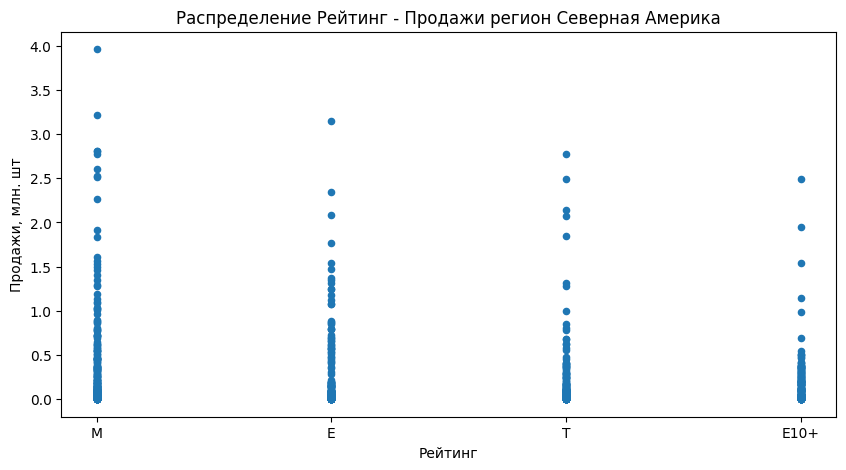

In [61]:
actual_rating.plot(kind='scatter', 
                   x='rating', 
                   y='na_sales', 
                   figsize=(10,5), 
                   title='Распределение Рейтинг - Продажи регион Северная Америка', 
                   xlabel='Рейтинг', 
                   ylabel='Продажи, млн. шт')
plt.show()

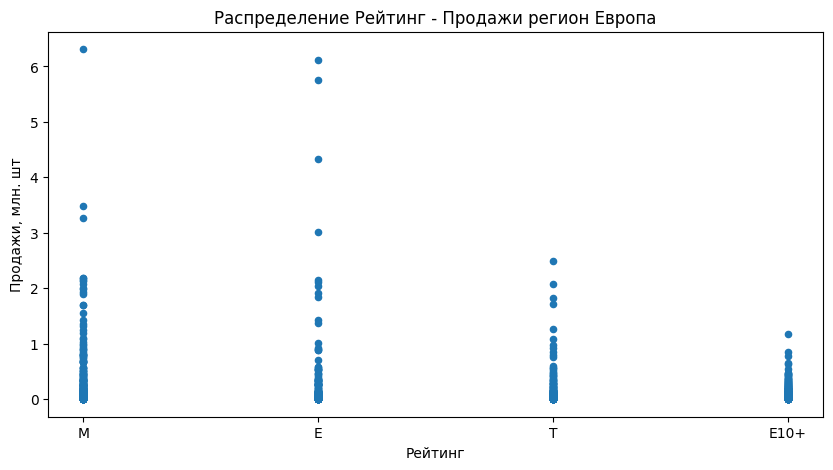

In [62]:
actual_rating.plot(kind='scatter', 
                   x='rating', 
                   y='eu_sales', 
                   figsize=(10,5), 
                   title='Распределение Рейтинг - Продажи регион Европа', 
                   xlabel='Рейтинг', 
                   ylabel='Продажи, млн. шт')
plt.show()

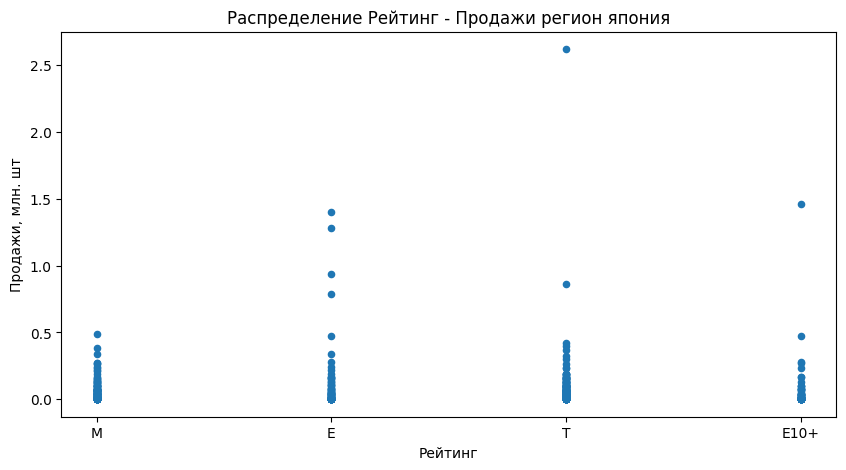

In [63]:
actual_rating.plot(kind='scatter', 
                   x='rating', 
                   y='jp_sales', 
                   figsize=(10,5),
                   title='Распределение Рейтинг - Продажи регион япония', 
                   xlabel='Рейтинг', 
                   ylabel='Продажи, млн. шт')
plt.show()

**Выводы:**

В регионах Северная Америка и Европа у наиболее продаваемых игр рейтинги E, M, T.
В Японии у наиболее продаваемых игр рейтинги E, T и E10+.

## Шаг 5. Проверяем гипотезы
Что средние пользовательские рейтинги платформ Xbox One и PC одинаковы.

Построим гистограммы распределений.

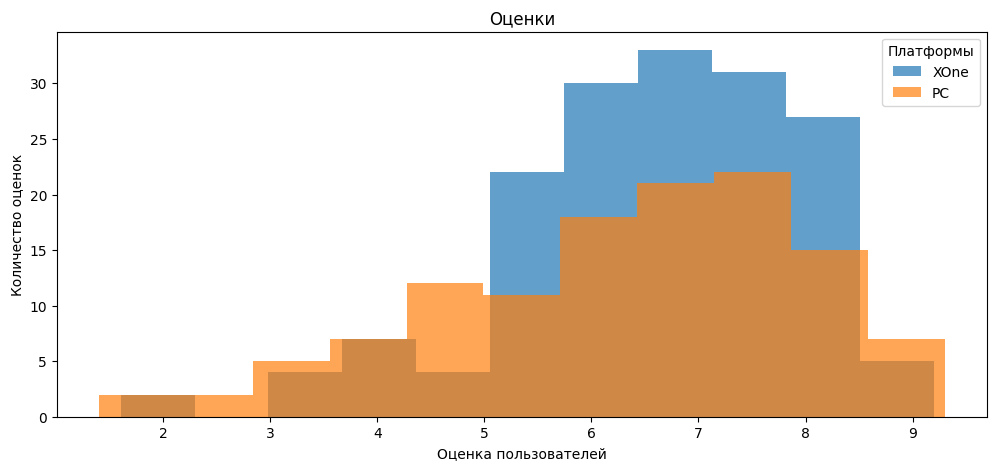

In [64]:
rating = actual_df.dropna(subset=['user_score'])
xbox_rating = rating[rating.platform == 'XOne'].reset_index(drop=True)['user_score']
pc_rating = rating[rating.platform == 'PC'].reset_index(drop=True)['user_score']
xbox_rating.plot(kind='hist', 
                 bins=11, 
                 figsize=(12,5), 
                 xlabel='Оценка пользователей', 
                 ylabel='Количество оценок', 
                 alpha=0.7,
                 title='Оценки', 
                 legend=True, 
                 label='XOne',)
pc_rating.plot(kind='hist', 
               bins=11, 
               figsize=(12,5), 
               xlabel='Оценка пользователей', 
               ylabel='Количество оценок', 
               alpha=0.7,
               title='Оценки', 
               legend=True, 
               label='PC',)
plt.legend(title='Платформы')
plt.show()

### Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
H0 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые. H1 - рейтинги разные. 
Нам нужен двухвыборочный тест для независимых выборок, альтернативная гипотеза двусторонняя - ttest_ind()

In [65]:
print('Средняя оценка пользоватей xbox:', round(xbox_rating.mean(), 2))
print('Средняя оценка пользоватей pc:', round(pc_rating.mean(), 2))
alpha = 0.05
# проверяем что средние значения равны
print('Проверим, что xbox_rating равен pc_rating')
results = st.ttest_ind(xbox_rating, pc_rating, alternative='two-sided')
print('p-value:', results.pvalue)
print('p-value < alpha - Нулевая гипотеза отвергается') if results.pvalue < alpha else print('p-value > alpha - Не получилось отвергнуть нулевую гипотезу')


Средняя оценка пользоватей xbox: 6.59
Средняя оценка пользоватей pc: 6.3
Проверим, что xbox_rating равен pc_rating
p-value: 0.10450507919348415
p-value > alpha - Не получилось отвергнуть нулевую гипотезу


**Вывод:** Не получилось отвергнуть нулевую гипотезу о равенстве средних оценок пользователей платформ Xbox One и PC. 
На имеющихся данных, на уровне значимости 5% нет оснований отвергнуть нулевую гипотезу о равенстве средних оценок пользователей платформ 
Xbox One и PC в пользу альтернативной гипотезы.

### Проверка гипотезы: средние пользовательские рейтинги жанров Action и Sports разные.
H0 - средние пользовательские рейтинги для игр жанров Action и Sports одинаковые. H1 - рейтинги разные.
Нам нужен двухвыборочный тест для независимых выборок, двусторонняя альтернативная гипотеза - ttest_ind()

In [66]:
rating = actual_df.dropna(subset=['user_score']).reset_index(drop=True)
action_rating = rating.query('genre=="Action"')['user_score']
sports_rating = rating.query('genre=="Sports"')['user_score']
print('Выборкас жанром Action:', action_rating.count())
print('Выборкас жанром Sports:', sports_rating.count())

Выборкас жанром Action: 297
Выборкас жанром Sports: 127


In [67]:
print('Средний рейтинг в жанре Action:', round(action_rating.mean(), 2))
print('Средний рейтинг в жанре Sports:', round(sports_rating.mean(), 2))
alpha = 0.05
# проверяем что средние значения равны
print('Проверим, что action_rating равен sports_rating')
results = st.ttest_ind(action_rating, sports_rating, alternative='two-sided')
print('p-value:', results.pvalue)
print('p-value < alpha - Нулевая гипотеза отвергается') if results.pvalue < alpha else print('p-value > alpha - Не получилось отвергнуть нулевую гипотезу')

Средний рейтинг в жанре Action: 6.76
Средний рейтинг в жанре Sports: 5.23
Проверим, что action_rating равен sports_rating
p-value: 2.8711147985105864e-19
p-value < alpha - Нулевая гипотеза отвергается


**Вывод:** Отвергаем нулевую гипотезу о равности рейтингов для игр в жанре Action и Sports. Пользовательские рейтинги разные.
На имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.

## Выводы:
В результате исследованиия были получены следующие результаты:

После очистки данных было получено 16500 записей, в которых собраны данные: 11400 игр в 12 жанрах на 21 платформе за период с 1980 по 2016 годы.

До 1994 года данных мало, потом идет активный рост релизов разных игр. С 2012 года количество скорректировалось - вероятно, что какие-то форматы и платформы совссем ушли. 
Средний срок жизни игровой платформы - 7 лет.
Для целей прогнозирования возьмем период с 2014 по 2016 годы, который включает 2 полных года (2014 и 2015) и данные за не полный 2016 год. Дальнейшая работа идет с данными за этот период.

Рост продаж наблюдается только у двух платформ - это платформы PS4 и XOne. Они же лидеры по объему продаж. При разработке игр стоит ориентироваться прежде всего на эти платформы.
На примере самой популярной платформы PS4 проверили, что влияние оценок критиков на продажи минимально, но оно есть. Влияние оценок пользователей на продажи отсутствует. Аналогичный результат получен при проверке зависимости продаж от оценок на платформе XOne.

Лидеры продаж игры в жанре Action. Так же высокие продажи в категориях Shooter, Sports, Role_Playing. Минимальные продажи у игр в жарнах Puzzle, Strategy, Simulation, Adventue, Platform.

По регионам платформы-лидеры отличаются.
Северная Америка - наиболее популярны игровые платформы: PS4, XOne, X360, 3DS, PS3.
На рынке Европы популярны платформы: PS4, XOne, PS3, PC, 3DS. Причем, PS4 занимамет больше половиниы от всех продаж.
В Японии популярны платформы: 3DS, PS4, PSV, PS3, WiiU.

Популярность жанров в северной Америке в порядке убывания: Shooter, Action, Sports, Role-Playing, Misc.
Европа: Action, Shooter, Sports, Role-Playing, Racing.
Япония: Role-Playing, Action, Fighting, Misc, Shooter.
Вкусы игроманов Америки и Европы во многом похожи. На рынке Японии наиболее популярный банр Role-Playing, а спрос на шутеры минимальный.

В регионах Северная Америка и Европа у наиболее продаваемых игр рейтинги E, M, T. В Японии у наиболее продаваемых игр рейтинги E, T и E10+.

В ходе исследования были проверены 2 гипотезы. Не получилось отвергнуть нулевую гипотезу о равенстве средних оценок пользователей платформ Xbox One и PC. Отвергнута обратная гипотеза о равенстве средних рейтингов жанров Action и Sports, что дает право утверждать, что средние рейтинги жанров Action и Sports разные.